<a href="https://colab.research.google.com/github/geeorgebixleer/Seaborn_Analisis_de_datos/blob/main/Seaborn_Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de datos con Seaborn

##**Introducción:**

El conjunto de datos 'credit_card.csv' contiene información sobre clientes y sus tarjetas de crédito. Incluye variables como cuenta corriente, escolaridad, estado civil, entre otras. Este conjunto de datos nos permite explorar y analizar diferentes aspectos relacionados con el comportamiento de los clientes en relación a sus tarjetas de crédito.


##Resumen:


Para este proyecto se generaron una variedad de gráficos utilizando la librería Seaborn, con la finalidad de analizar e interpretar las variables categóricas y numéricas de los clientes pertenecientes a una base de datos denominada "credit_card". Entre los gráficos encontramos displot, countplot, catplot, boxplot, violinplot, scatterplot, entre otros.

Se encontró que existe correlación entre el limite de crédito, el indice de uso, el valor de factura y la morosidad, respecto a la edad, el estado civil y la escolaridad del titular de la cuenta. De forma general, podemos asumir que:

- Al rededor de 60% de los clientes cuentan con una cuenta corriente y tarjeta de crédito, mientras que los clientes con tarjeta de crédito pero sin cuenta corriente es de poco más del 40%.

- Habitualmente, los limites de crédito van de los $1000-80,000 MXN.

- Los clientes con mayor limite de crédito corresponden al rango de edad 30-40 años, seguido de las personas con 40-50 años. Las personas con 20-30 años cuentan con los limites más bajos.

- A medida que aumenta el valor de la factura aumenta el índice de uso, por lo que existen clientes que tienen alto limite y un alto iu, asi como clientes con bajo limite y bajo iu.

##1.Configuración del ambiente

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums

In [2]:
!pip install seaborn

##2.Importando base de datos


In [3]:
datos = pd.read_csv('credit_card.csv')

In [4]:
datos.head()

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         1500 non-null   int64  
 1   CHECKING_ACCOUNT  1500 non-null   object 
 2   EDUCATION         1500 non-null   object 
 3   MARRIAGE          1500 non-null   object 
 4   AGE               1500 non-null   int64  
 5   BILL_AMT          1500 non-null   float64
 6   PAY_AMT           1500 non-null   float64
 7   DEFAULT           1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


##3.Transformación de datos

In [6]:
datos.columns

Index(['LIMIT_BAL', 'CHECKING_ACCOUNT', 'EDUCATION', 'MARRIAGE', 'AGE',
       'BILL_AMT', 'PAY_AMT', 'DEFAULT'],
      dtype='object')

In [7]:
# diccionario para renombrar columnas
dic_columnas = {
    'LIMIT_BAL' : 'limite',
    'CHECKING_ACCOUNT' : 'cuenta_corriente',
    'EDUCATION' : 'escolaridad',
    'MARRIAGE' : 'estado_civil',
    'AGE' : 'edad',
    'BILL_AMT' : 'valor_factura',
    'PAY_AMT' : 'valor_pago',
    'DEFAULT' : 'moroso'
}

In [8]:
# renombrando atributos
tarjetas = datos.copy() # copia del dataframe original
tarjetas = tarjetas.rename(columns = dic_columnas) #renombrando columnas

In [9]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [10]:
# diccionario cuenta
dic_cuenta = {
    'Yes' : 'Si',
    'No' : 'No'
}

# diccionario escolaridad
dic_escolaridad = {
    '2.University' : '2.Universidad',
    '3.Graduate School' : '3.Pos-graduacion',
    '1.High School' : '1.Colegio'
}

# diccionario estado_civil
dic_estado_civil = {
  'Married': 'Casado/a',
  'Single' : 'Soltero/a'
}

In [11]:
# sustituyendo valores en atributos cuenta_corriente
tarjetas.cuenta_corriente = tarjetas.cuenta_corriente.map(dic_cuenta)
# sustituyendo valores en atributos escolaridad
tarjetas.escolaridad = tarjetas.escolaridad.map(dic_escolaridad)
# Sustituyendo valores en atributos estado_civil
tarjetas.estado_civil = tarjetas.estado_civil.map(dic_estado_civil)

In [12]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0


##4.Análisis de variables numéricas: displot

In [13]:
tarjetas.shape

(1500, 8)

In [14]:
tarjetas['escolaridad'].unique()

array(['2.Universidad', '3.Pos-graduacion', '1.Colegio'], dtype=object)

In [15]:
tarjetas.describe()

,limite,edad,valor_factura,valor_pago,moroso
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261
min,3011.000000,21.000000,27.701200,0.000000,0.000000
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000


###4.1. Limite de crédito

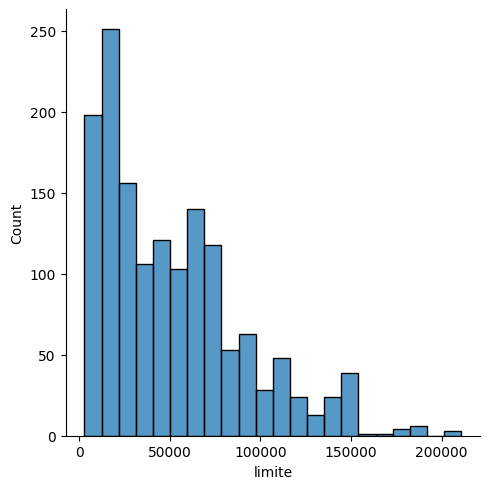

In [16]:
sns.displot(data=tarjetas, x='limite'); # data=df, x=atributo

- De este gráfico se observa que, la mayor parte de las personas con tarjeta de crédito tienen un limite entre los $1000 - 5000 MXN.

- Una menor proporción tiene un limite entre $6000 - 8000 MXN.


###4.2.Limite de crédito - escolaridad

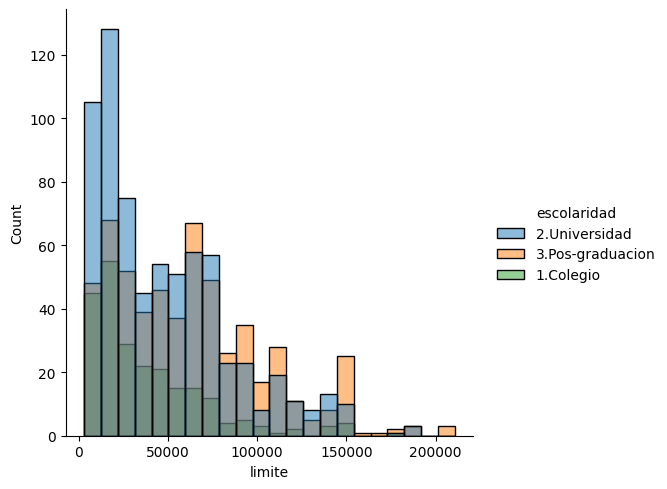

In [17]:
# grafico con 3 variables
sns.displot(data=tarjetas, x='limite', hue='escolaridad') #columna adicional

Según la escolaridad:

- Las personas con estudios de 'Colegio' corresponden a la mayor parte de personas con creditos.

- Las personas con estudios de 'Colegio' y 'Universidad', en su mayoría tienen crédito entre los $1000-3000 MXN.

- Las personas con estudio de 'Pos-graduación' tienen mayor limite de crédito, los cuales oscilan entre los $8000-200,000 MXN.

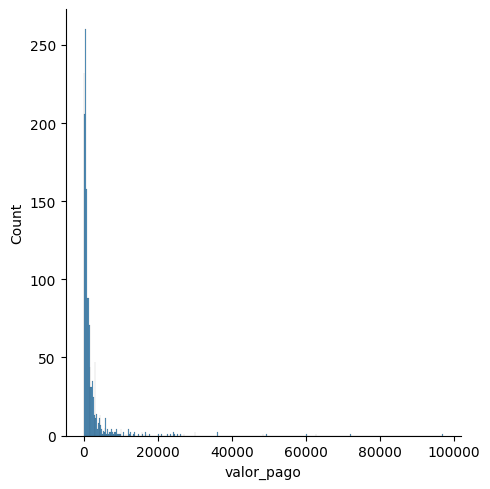

In [18]:
# gráfico de distribución de la variable 'valor_pago'
sns.displot(data=tarjetas, x='valor_pago');

###4.3.Atributo: índice de uso (iu)

In [19]:
tarjetas['iu'] = tarjetas['valor_factura'] / tarjetas['limite']  #iu=indice de uso, porcentaje de uso del limite
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0,0.824046


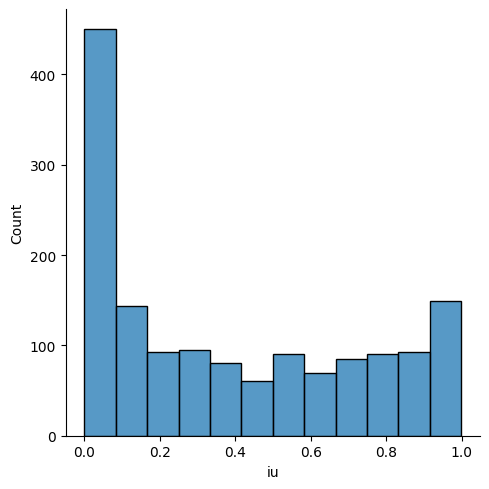

In [20]:
sns.displot(data=tarjetas, x='iu')

- Una cantidad significativa de clientes usa bajos porcentajes del limite disponible de las tarjetas de credito.

###4.4.Personalizando histogramas

https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [21]:
sns.set_style('whitegrid') #grid blanco

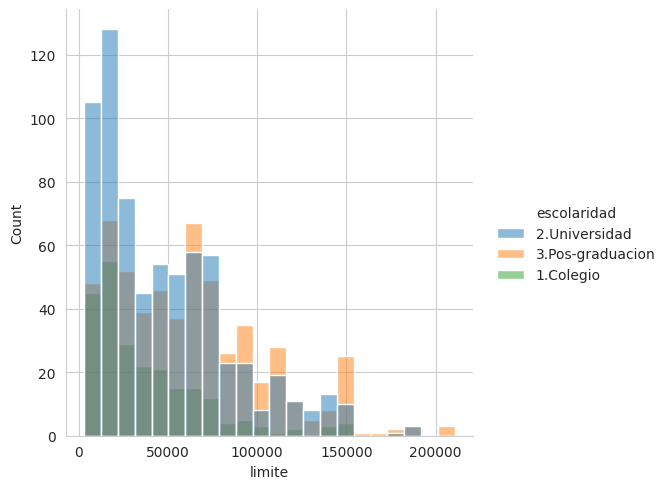

In [22]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad')

In [23]:
sns.set_style('darkgrid') #grid oscuro

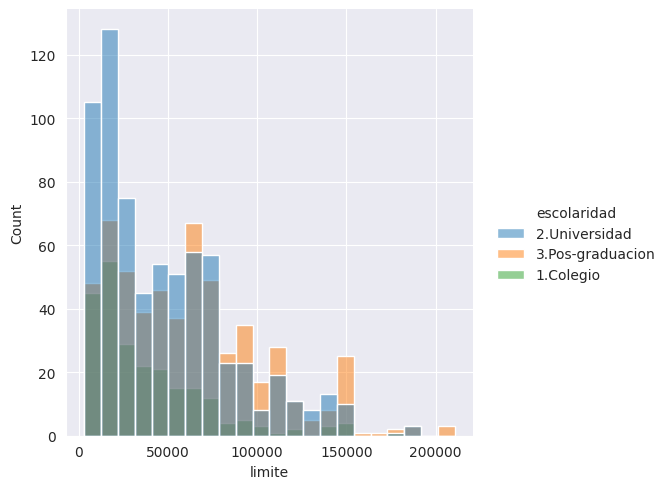

In [24]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad')

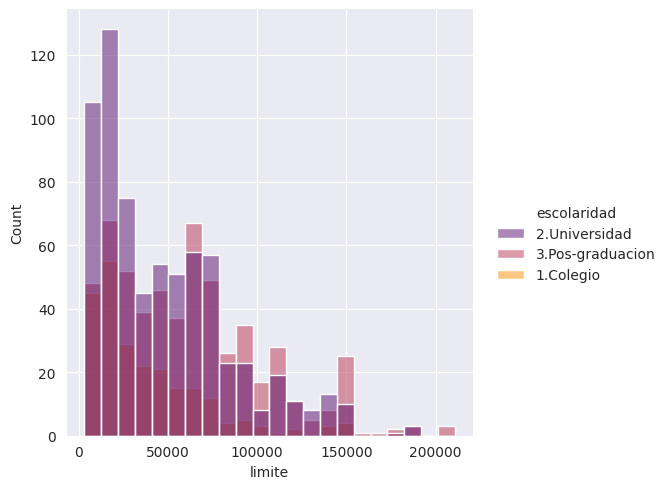

In [25]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad', palette='inferno') #palette=tema de color

##5.Análisis de variables categóricas:

In [26]:
tarjetas.head() #variables categoricas:  cuenta_corriente, escolaridad, estado_civil

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0,0.824046


###5.1.Countplot

<Axes: xlabel='cuenta_corriente', ylabel='count'>

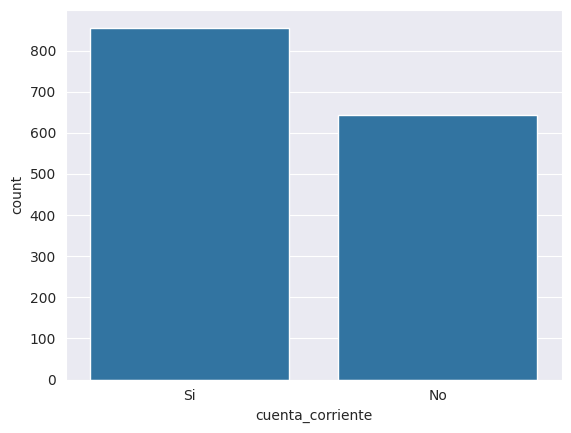

In [27]:
sns.countplot(x='cuenta_corriente', data=tarjetas) #cuentas de tarjetas

- En general, son más los clientes que tienen una cuenta corriente.
- Por otra parte, los clientes con tarjetas de credito son poco más del 40%.

<Axes: xlabel='moroso', ylabel='count'>

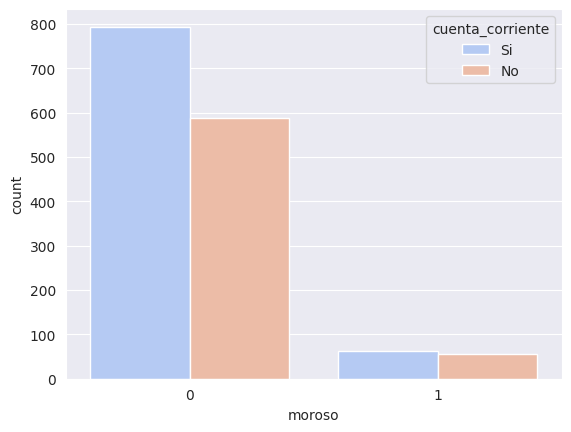

In [28]:
sns.countplot(x='moroso', data=tarjetas, hue='cuenta_corriente', palette='coolwarm')

- En terminos relativos, el número de personas morosas es igual entre las personas que tienen una cuenta corriente y las que no.

###5.2.Catplot

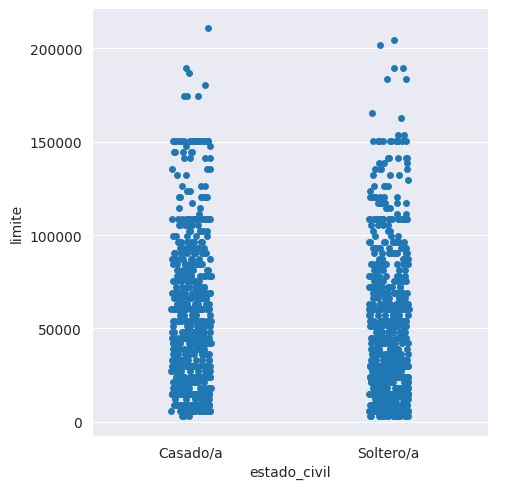

In [29]:
sns.catplot(x='estado_civil', y='limite', data=tarjetas) #grafico dispersion

- Las solteras suelen tener tener más crédito que las personas casadas, sin embargo, el limite de las personas casadas es superior al de las personas solteras.

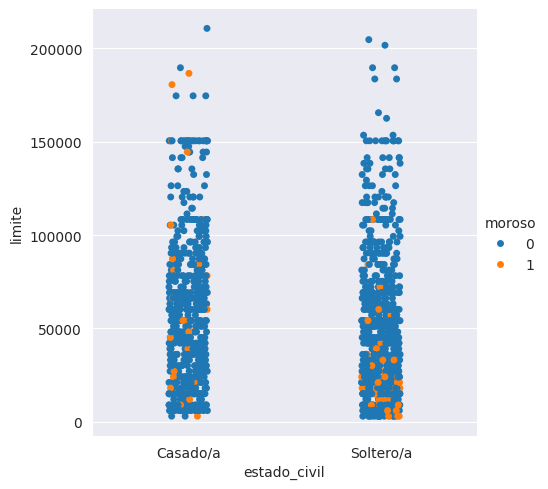

In [30]:
sns.catplot(x='estado_civil', y='limite', data=tarjetas, hue='moroso')

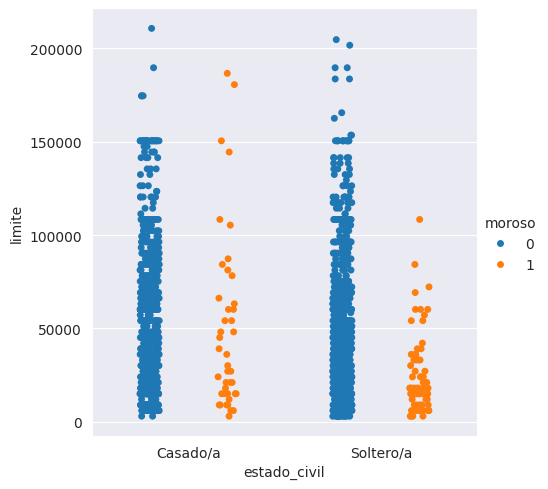

In [31]:
sns.catplot(x='estado_civil', y='limite', data=tarjetas, hue='moroso', dodge=True) #'dodge' permite separar las variables

- Las personas morosas tienen mas limite cuando son casados que cuando están solteras.

- Las personas morosas y solteras tienen menor limite de credito que los casados y morosos.

###5.3.Swarmplot

<ipython-input-32-f9f72f07ed31>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='escolaridad', y='iu', data=tarjetas, palette='magma') #swarmplot evita que los puntos se sobrepongan
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='iu'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


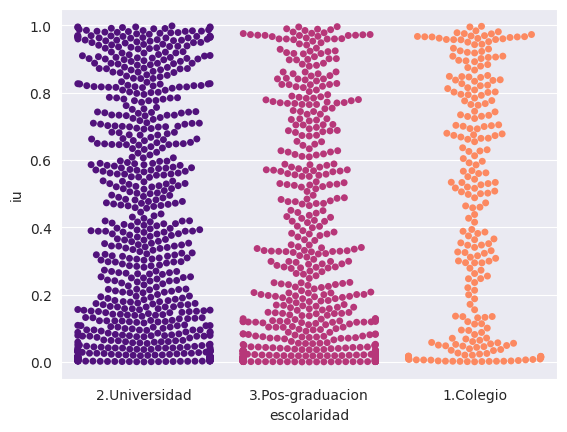

In [32]:
sns.swarmplot(x='escolaridad', y='iu', data=tarjetas, palette='magma') #swarmplot evita que los puntos se sobrepongan

- Las personas con estudios de 'Universidad' tienen un mayor indice de uso del credito disponible.
- Mientras que, las personas con estudios de 'Colegio', representan un bajo indice de uso.

###5.4.Boxplot

<Axes: xlabel='escolaridad', ylabel='iu'>

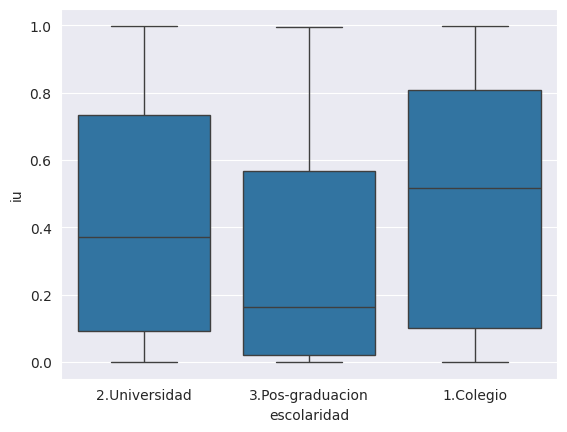

In [33]:
sns.boxplot(x='escolaridad', y='iu', data=tarjetas)

Orden descendente de Indice de uso(iu) según escolaridad:

- 1er. Colegio, 2do. Universidad, 3er. Pos-graduación

<Axes: xlabel='escolaridad', ylabel='iu'>

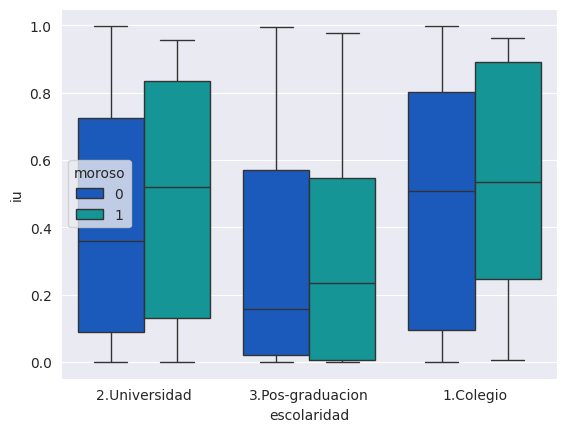

In [34]:
sns.boxplot(x='escolaridad', y='iu', data=tarjetas, hue='moroso', palette='winter')

- Las personas morosas suelen tener un mayor indice de uso.
- Los clientes con mayor indice de uso y mayor posibilidad de ser moroso son quienes cuentan con estudios de 'Colegio' y 'Universidad'.
- Quienes cuentan con estudios de 'Pos-graduación' suelen tener un menor indice de uso y menor posibilidad de ser morosos.

###5.5.Violinplot

<Axes: xlabel='escolaridad', ylabel='iu'>

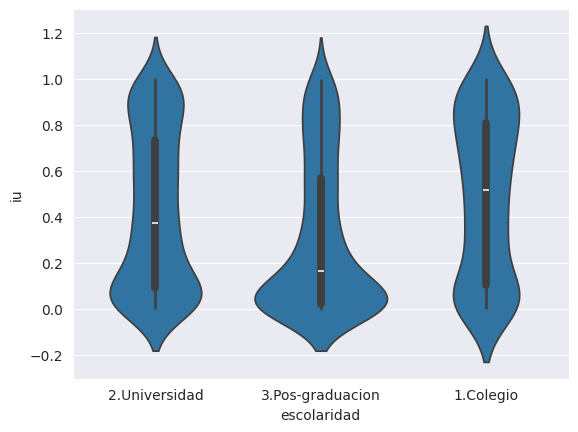

In [35]:
sns.violinplot(x='escolaridad', y='iu', data=tarjetas)
# punto blanco = media,
#linea negra=valores inf y sup

<Axes: xlabel='escolaridad', ylabel='iu'>

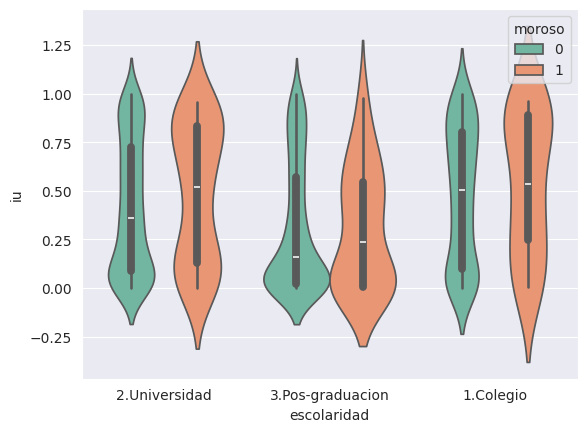

In [36]:
sns.violinplot(x='escolaridad', y='iu', data=tarjetas, hue='moroso', palette='Set2')

Se representa en otro tipo de visualización la información mostrada en el último boxplot.

- Las personas morosas tienen un mayor indice de uso.
- Clientes con estudios de 'Colegio' y 'Universidad' tienen un mayor indice de uso.
- 'Pos-graduados' hacen un menor uso del crédito y es menos proable que sean morosos.

###5.6.Varibles categóricas: *rango de edad*

Para analizar la edad lo adecuado es establecer rangos.

In [37]:
tarjetas.edad.unique()

array([24, 26, 34, 37, 29, 23, 28, 51, 41, 30, 49, 39, 40, 47, 27, 33, 32,
       54, 58, 22, 31, 25, 42, 45, 57, 56, 44, 35, 53, 43, 38, 63, 36, 52,
       46, 50, 48, 75, 55, 73, 59, 21, 60, 67, 61, 62, 70, 72])

In [38]:
edades = [20,30, 40, 50, 100]
rangos = ['20-30', '30-40', '40-50', '50+'] #nombres de rangos

tarjetas['rango_edad'] = pd.cut(tarjetas['edad'], bins=edades, labels=rangos) #pd.cut= realiza los cortes, bins=rango de cortes, labels=etiqueta del corte

In [39]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30


<Axes: xlabel='rango_edad', ylabel='limite'>

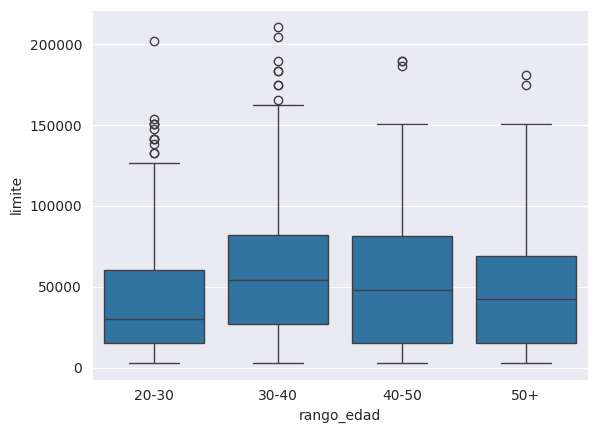

In [40]:
# será que las peronas de más edad tienen mayor limite?
sns.boxplot(x='rango_edad', y='limite', data=tarjetas)

**Personas con mayor limite:**
- Los clientes con mayor limite de crédito corresponden al rango de edad 30-40 años, seguido de las personas con 40-50 años.
- Quienes poseen menor limite de crédito son las personas con 20-30 años.

##5.7. Varibles categóricas: rango de índice de uso

In [41]:
porcentaje = [0, 0.25, 0.50, 0.75, 1]
rango_p = ['0%-25%', '25%-50%', '50%-75%', '75%-100%']

tarjetas['rango_iu'] = pd.cut(tarjetas['iu'], bins=porcentaje, labels=rango_p)

In [42]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad,rango_iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30,0%-25%
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30,0%-25%
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40,0%-25%
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40,75%-100%
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30,75%-100%


<Axes: xlabel='rango_iu', ylabel='limite'>

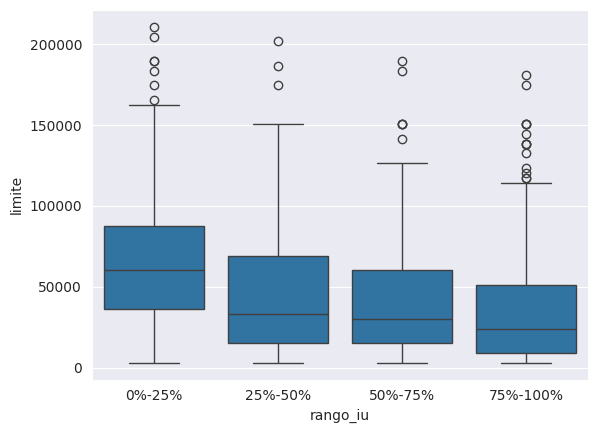

In [43]:
sns.boxplot(x='rango_iu', y='limite', data=tarjetas)

##6.Análisis de variables numéricas y regresión

In [44]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad,rango_iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30,0%-25%
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30,0%-25%
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40,0%-25%
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40,75%-100%
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30,75%-100%


###6.1.Displot

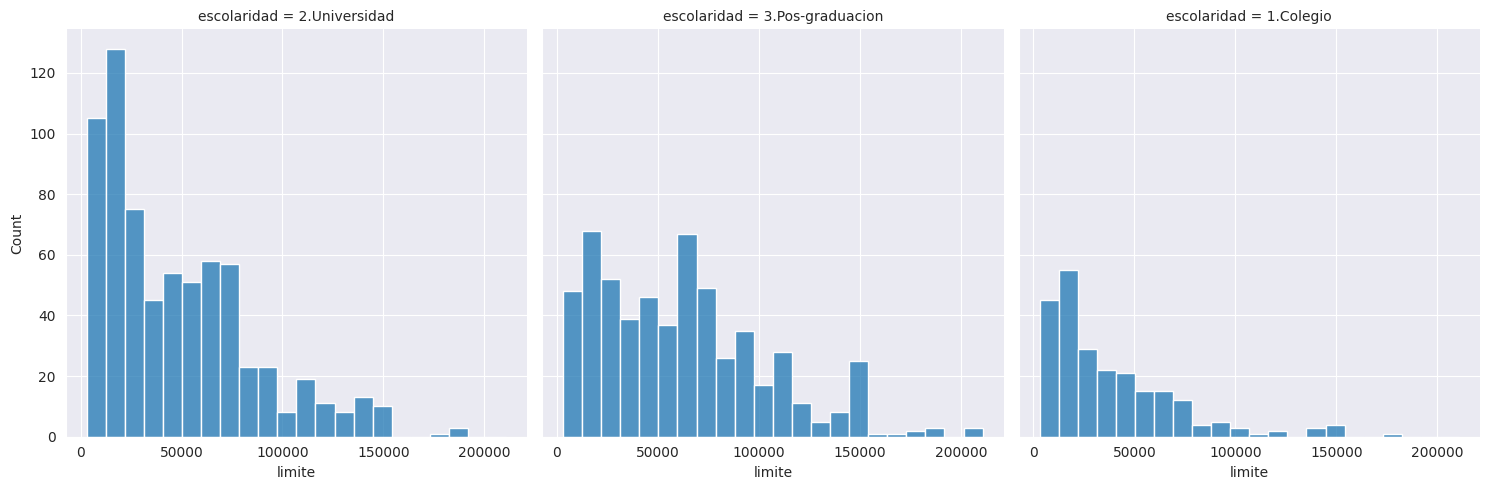

In [45]:
sns.displot(data=tarjetas, x='limite', col='escolaridad') #col= crea un grafico para cada valor

- Las personas con mayor limite de crédito son quienes tienen estudios de 'Pos-graduación', seguidos de quienes tienen 'Universidad'.
- Las personas con estudios de 'Colegio' son quienes tienen un menor limite de credito.
- Por otra parte, la mayor proporción de personas con limite de crédito entre los $1000-8000 MXN corresponde a clientes con 'Universidad'.

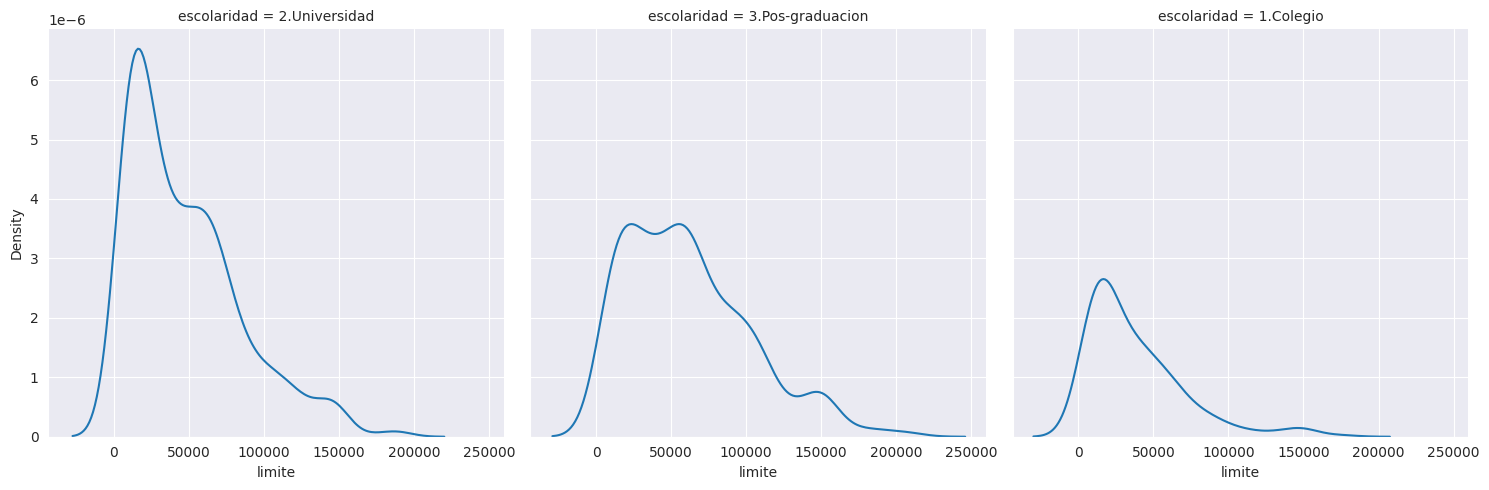

In [46]:
sns.displot(data=tarjetas, x='limite', col='escolaridad', kind='kde') #kde= kernel density stimation/funcion de densidad

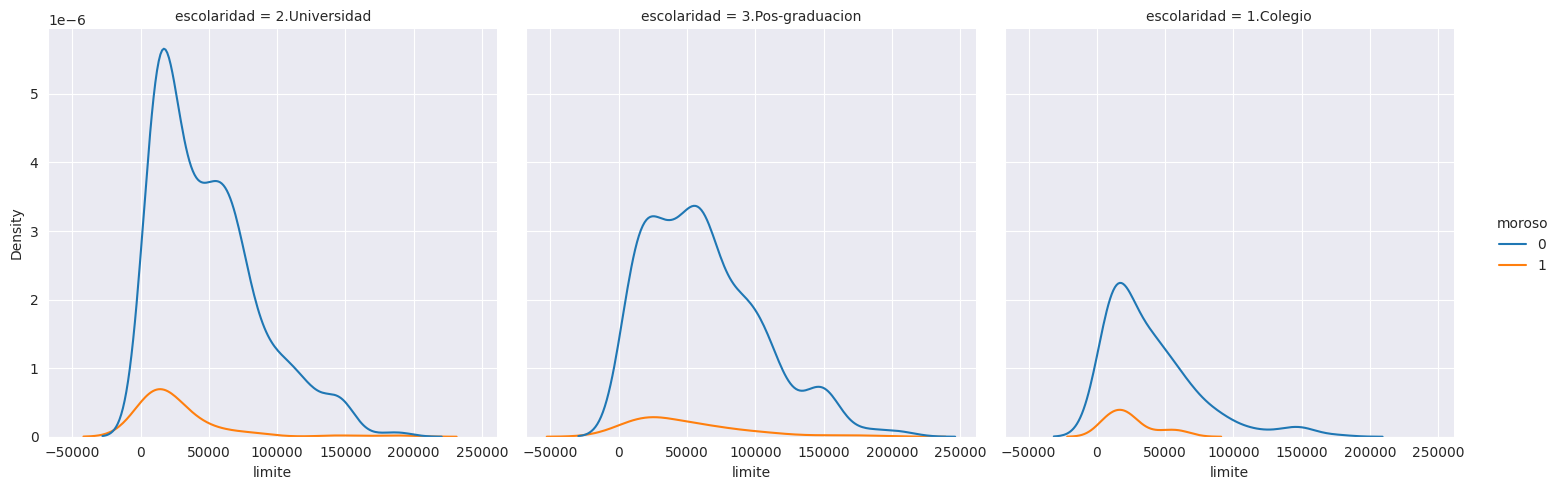

In [47]:
sns.displot(data=tarjetas, x='limite', col='escolaridad', kind='kde', hue='moroso')

Respecto a clientes morosos:

- Los clientes con 'Universidad' representan el pico más alto de morosidad, seguido de quienes cuentan con 'Colegio'.

- No obstante, aunque as personas con 'Pos-graduación' son quienes representan el menor pico de morosidad, son quienes adquieren un mayor limite de deuda.

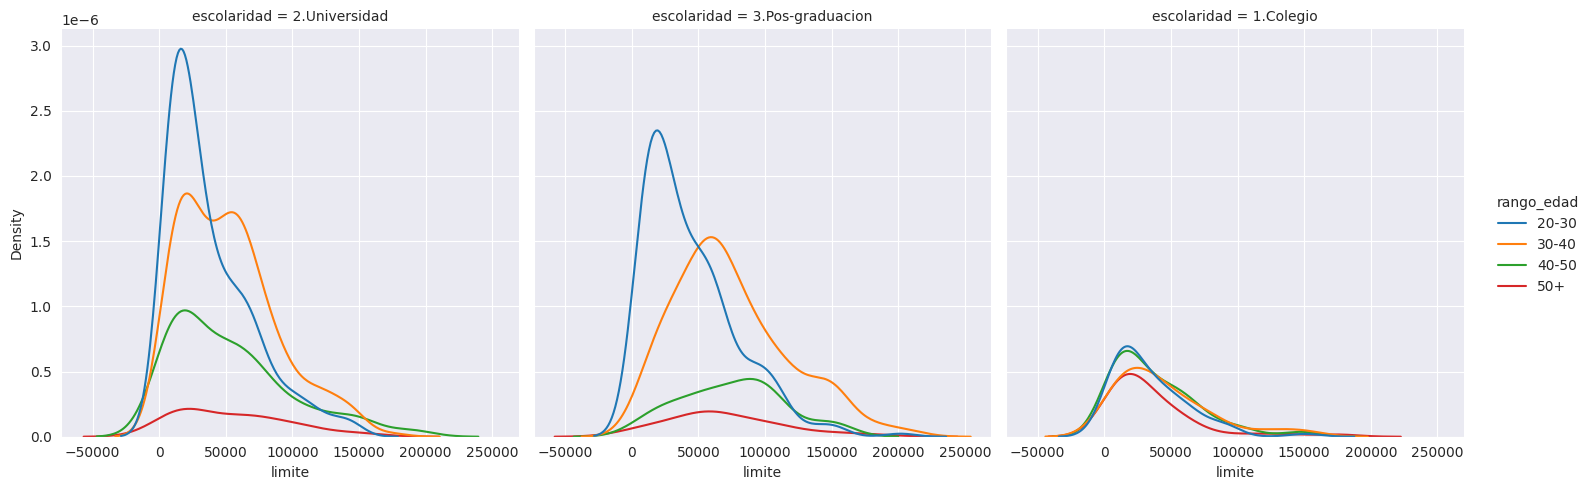

In [48]:
sns.displot(data=tarjetas, x='limite', col='escolaridad', kind='kde', hue='rango_edad')

De acuerdo al panel anterior:

- La mayor densidad de personas que poseen crédito, corresponde a quienes tienen estudios de 'Universidad', especificamente la población con 20-30 años, seguido por personas con 30-40 años. Los limites de crédito oscilan entre $1000-50,000 MXN.

- Para el caso de personas con estudios de 'Pos-graduación', son el segundo grupo con mayor densidad de crédito, quienes en su mayoría pertenecen a los rangos de edad de 20-30 y 40-40 años. El limite de crédito suele variar entre $1000-100,000 MXN.

- Asímismo, las personas con escolaridad de 'Colegio' son quienes representan la menor densidad de crédito. A diferencia de los casos anteriores, los limites de crédito van de los $1000-8000 MXN, y encontramos que este es el limite para todos los rangos de edades (de 20 hasta más de 50 años).

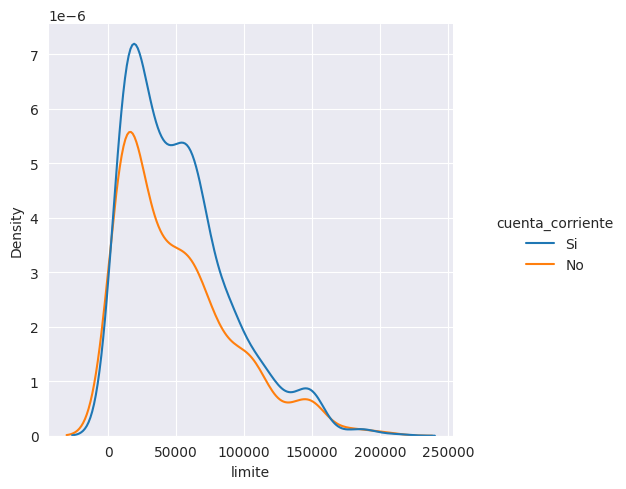

In [49]:
sns.displot(data=tarjetas, x='limite', hue='cuenta_corriente', kind='kde')

- Las personas que tienen cuenta corriente solicitan crédito con mayor frecuencia que quienes no tienen una cuenta.

- Las pesonas sin cuenta corriente pueden tener el mismo limite de crédito que una persona que sí tiene cuenta corriente.

- Habitualmente, los limites de crédito van de los $1000-80,000 MXN.

##6.2.Scatterplot

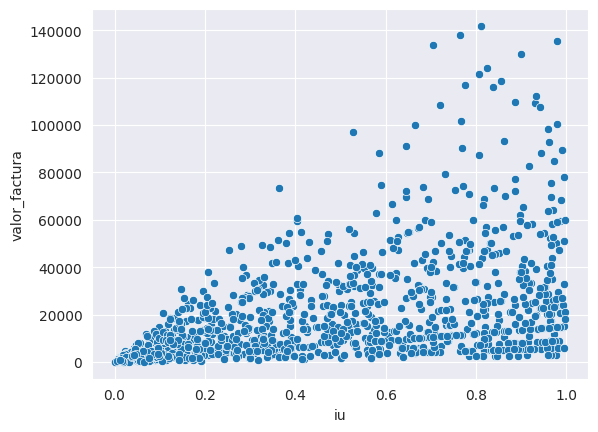

In [50]:
sns.scatterplot(x='iu', y='valor_factura', data=tarjetas); # ; = no aparece titulo defecto

- A medida que aumenta el valor de la factura aumenta el iu.

- Encontramos clientes que tienen alto limite y un alto iu, asi como clientes con bajo limite y bajo iu.

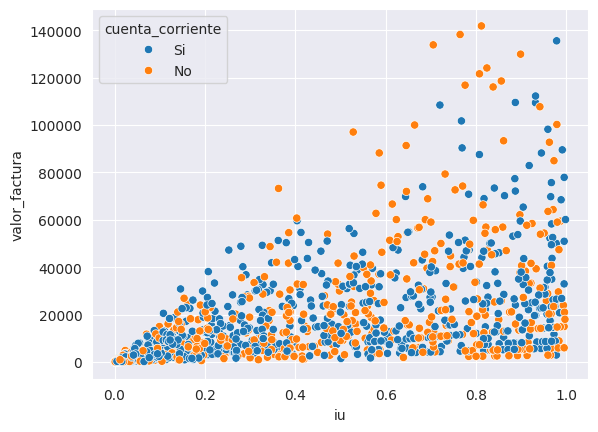

In [51]:
sns.scatterplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente');

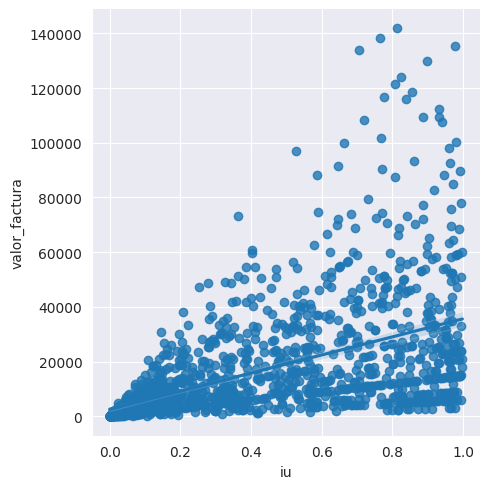

In [52]:
  sns.lmplot(x='iu', y='valor_factura', data=tarjetas); #lm linear model

- La linea de tendencia- indica que relación de ambas variables 'iu' y 'valor_factura' es altamente proporcional

##7.Test de hipótesis

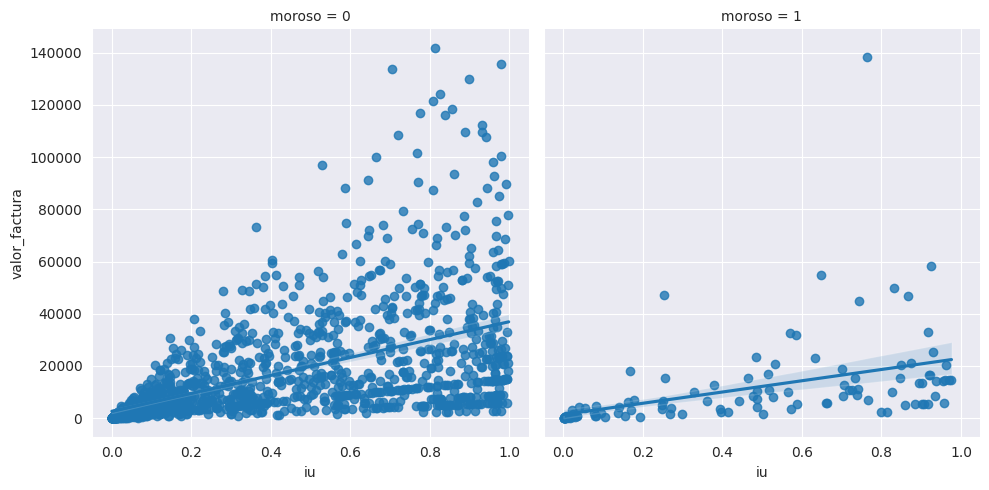

In [53]:
sns.lmplot(x='iu', y='valor_factura', data=tarjetas, col='moroso');

H<sup>null<sup>  <!-- indice superior -->
- Hipótesis nula

La distribución de los grupos moroso y no morosos es la misma

H<sup>alt<sup> <!-- alternativa -->
- Hipótesis alternativa

La distribución de los grupos moroso y no moroso no es la misma

In [54]:
moroso= tarjetas.query("moroso == 1").valor_factura
moroso

0         934.0122
1         519.3975
38      10891.0881
45        330.6078
47       7316.7300
           ...    
1448     1619.0147
1472    17048.2820
1475     4402.0820
1478     1851.1628
1495      295.0780
Name: valor_factura, Length: 117, dtype: float64

In [55]:
no_moroso= tarjetas.query("moroso == 0").valor_factura
no_moroso

2         4223.5297
3        14522.9563
4       124060.1253
5          114.4180
6         4244.3056
           ...     
1494     32698.2556
1496     23637.8555
1497       962.9178
1498       864.7592
1499     97022.8508
Name: valor_factura, Length: 1383, dtype: float64

In [56]:
resultado = ranksums(moroso, no_moroso)

In [57]:
print("El p_value de nuestro test es {}".format(resultado.pvalue))

El p_value de nuestro test es 0.010391243081223555


- Un pvalue =< a 0.05% ayudan a aceptar hipotesis alternativa.
- Hay una diferencia signifitiva entre la distribución.
- Se acepta la hipótesis alternativa.



##8.Análisis conjunto de variables

###8.1. Jointplot

Permite visualizar al mismo tiempo como es la distribución individual de una variable y cómo se relaciona con otra variable con la que deseemos hacer comparaciones.

In [58]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad,rango_iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30,0%-25%
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30,0%-25%
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40,0%-25%
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40,75%-100%
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30,75%-100%


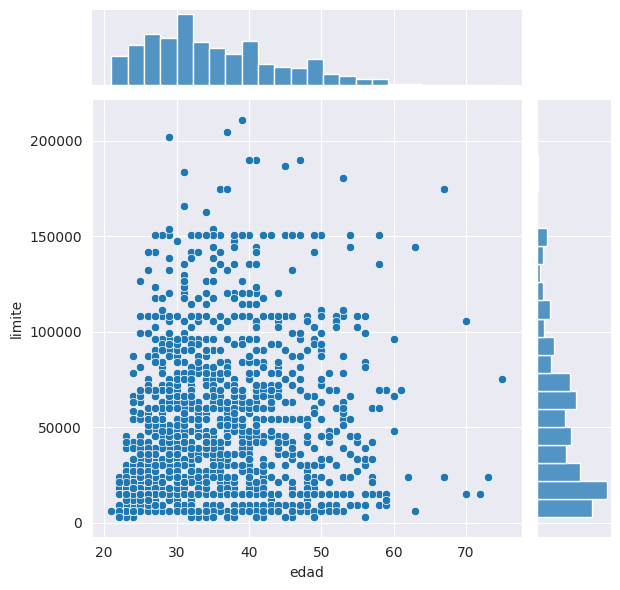

In [59]:
sns.jointplot(x='edad', y='limite', data=tarjetas)

Dispersión al medio. Arriba y a la derecha grafico de barras que indi

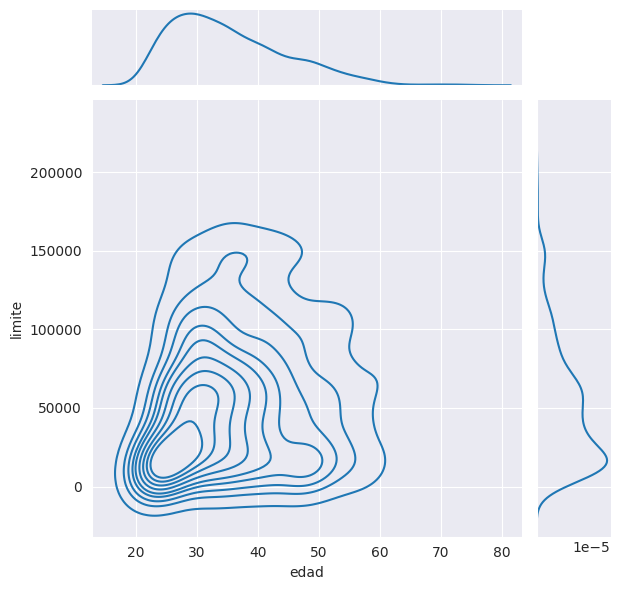

In [60]:
sns.jointplot(x='edad', y='limite', data=tarjetas, kind='kde') #kde

Cuando las lineas están más juntas la densidad es mayor. Arriba gráfico de densidad

Grupo moroso en contración 20-30 años con limites bajos


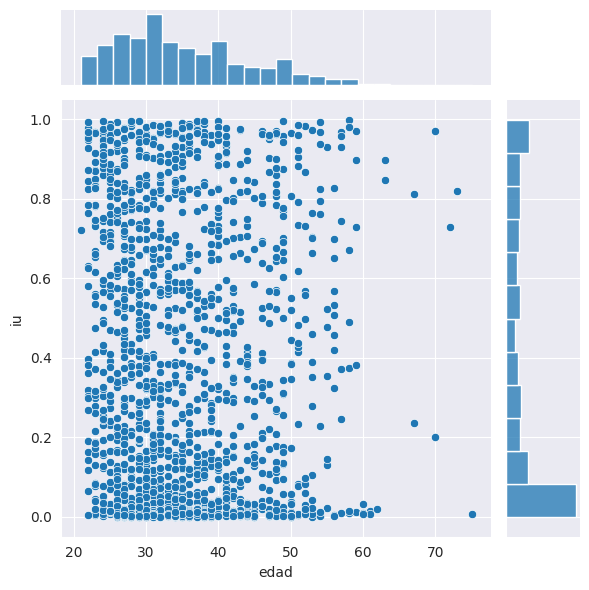

In [61]:
sns.jointplot(x='edad', y='iu', data=tarjetas, kind='scatter');

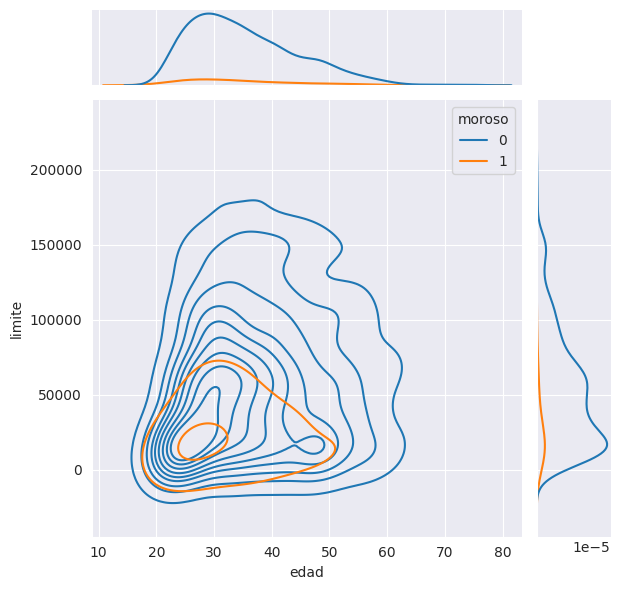

In [62]:
sns.jointplot(x='edad', y='limite', data=tarjetas, kind='kde', hue='moroso')

###8.2. Pairplot

Pairplot creará una columna y una fila para cada variable numérica presente en nuestra base de datos y hará un análisis de cada variable individualmente y como se relaciona con las demás variables numéricas de la base.

In [63]:
tarjetas.describe()

,limite,edad,valor_factura,valor_pago,moroso,iu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010


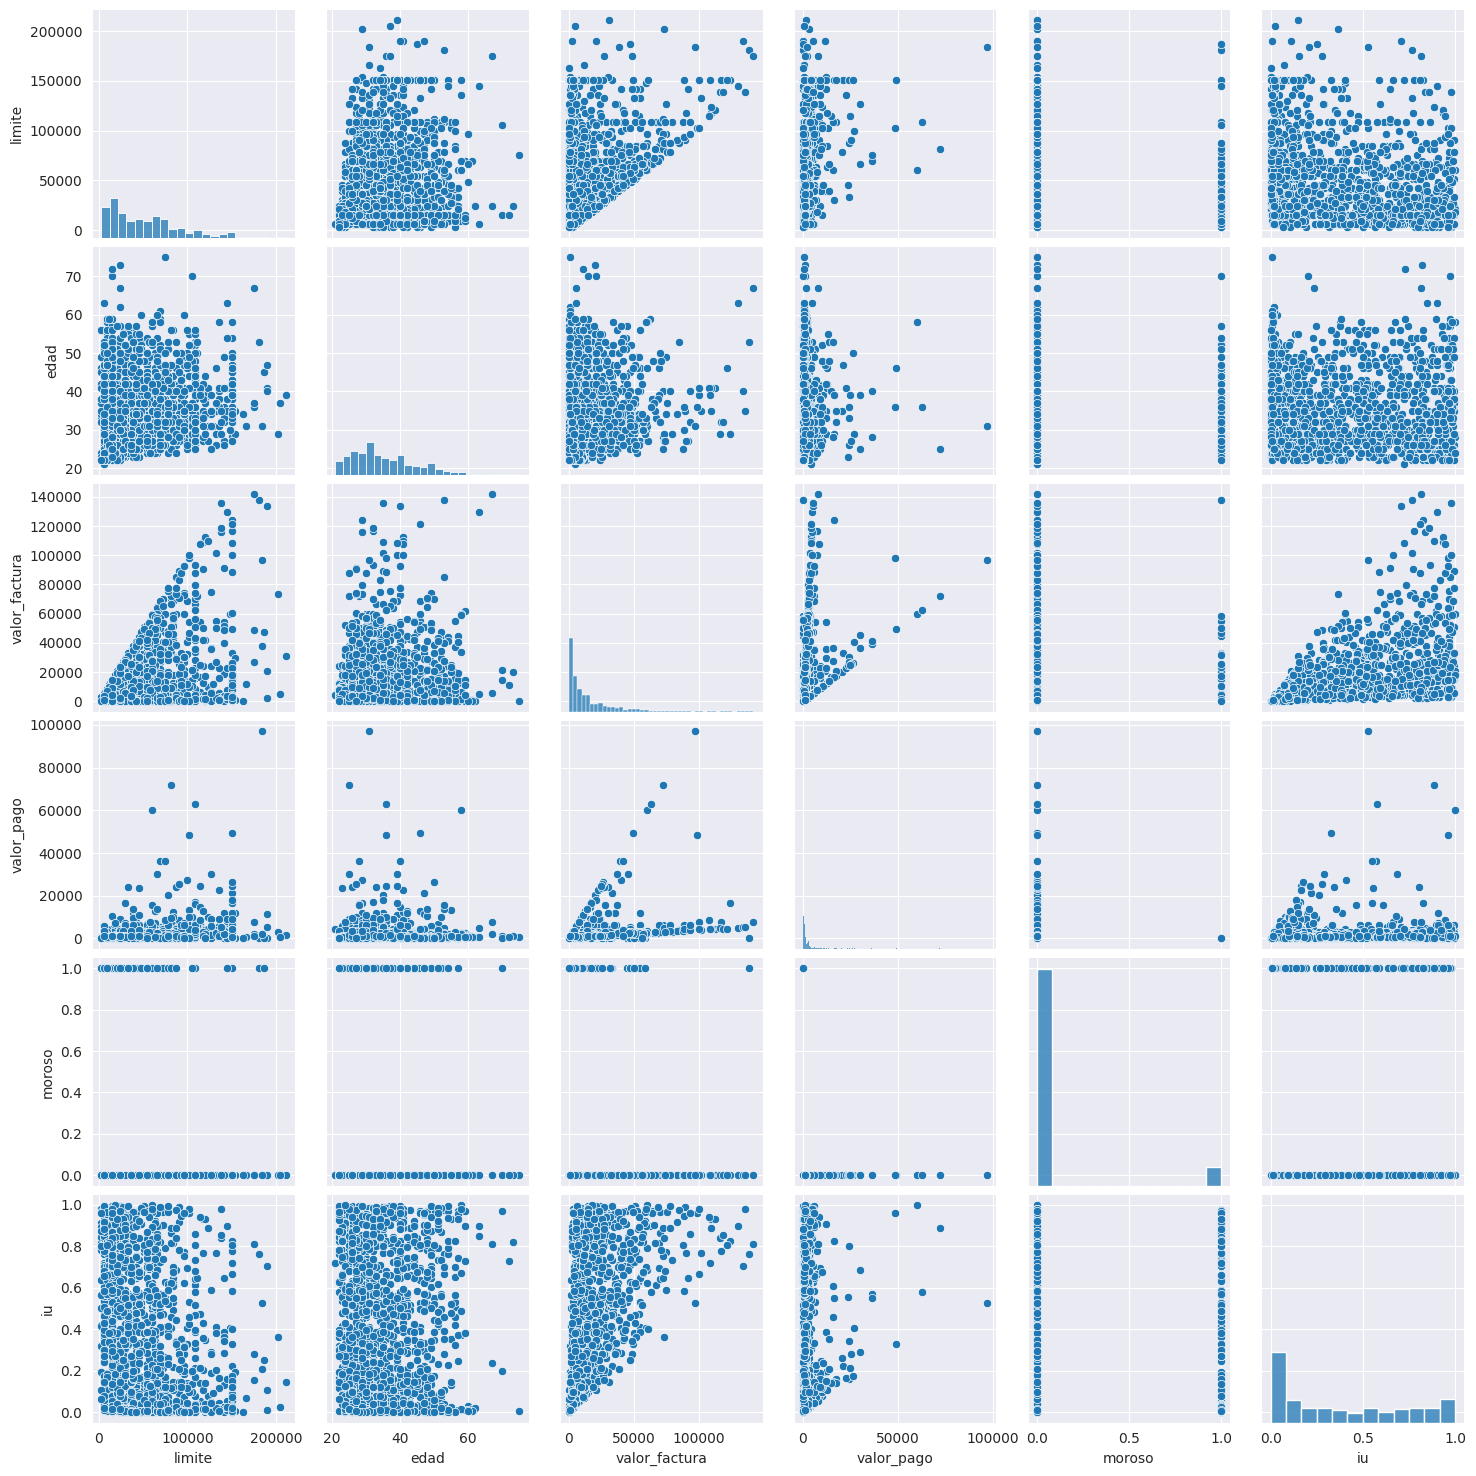

In [64]:
sns.pairplot(data=tarjetas) #genera un gráfico rapido de cada variable y como se relacionan

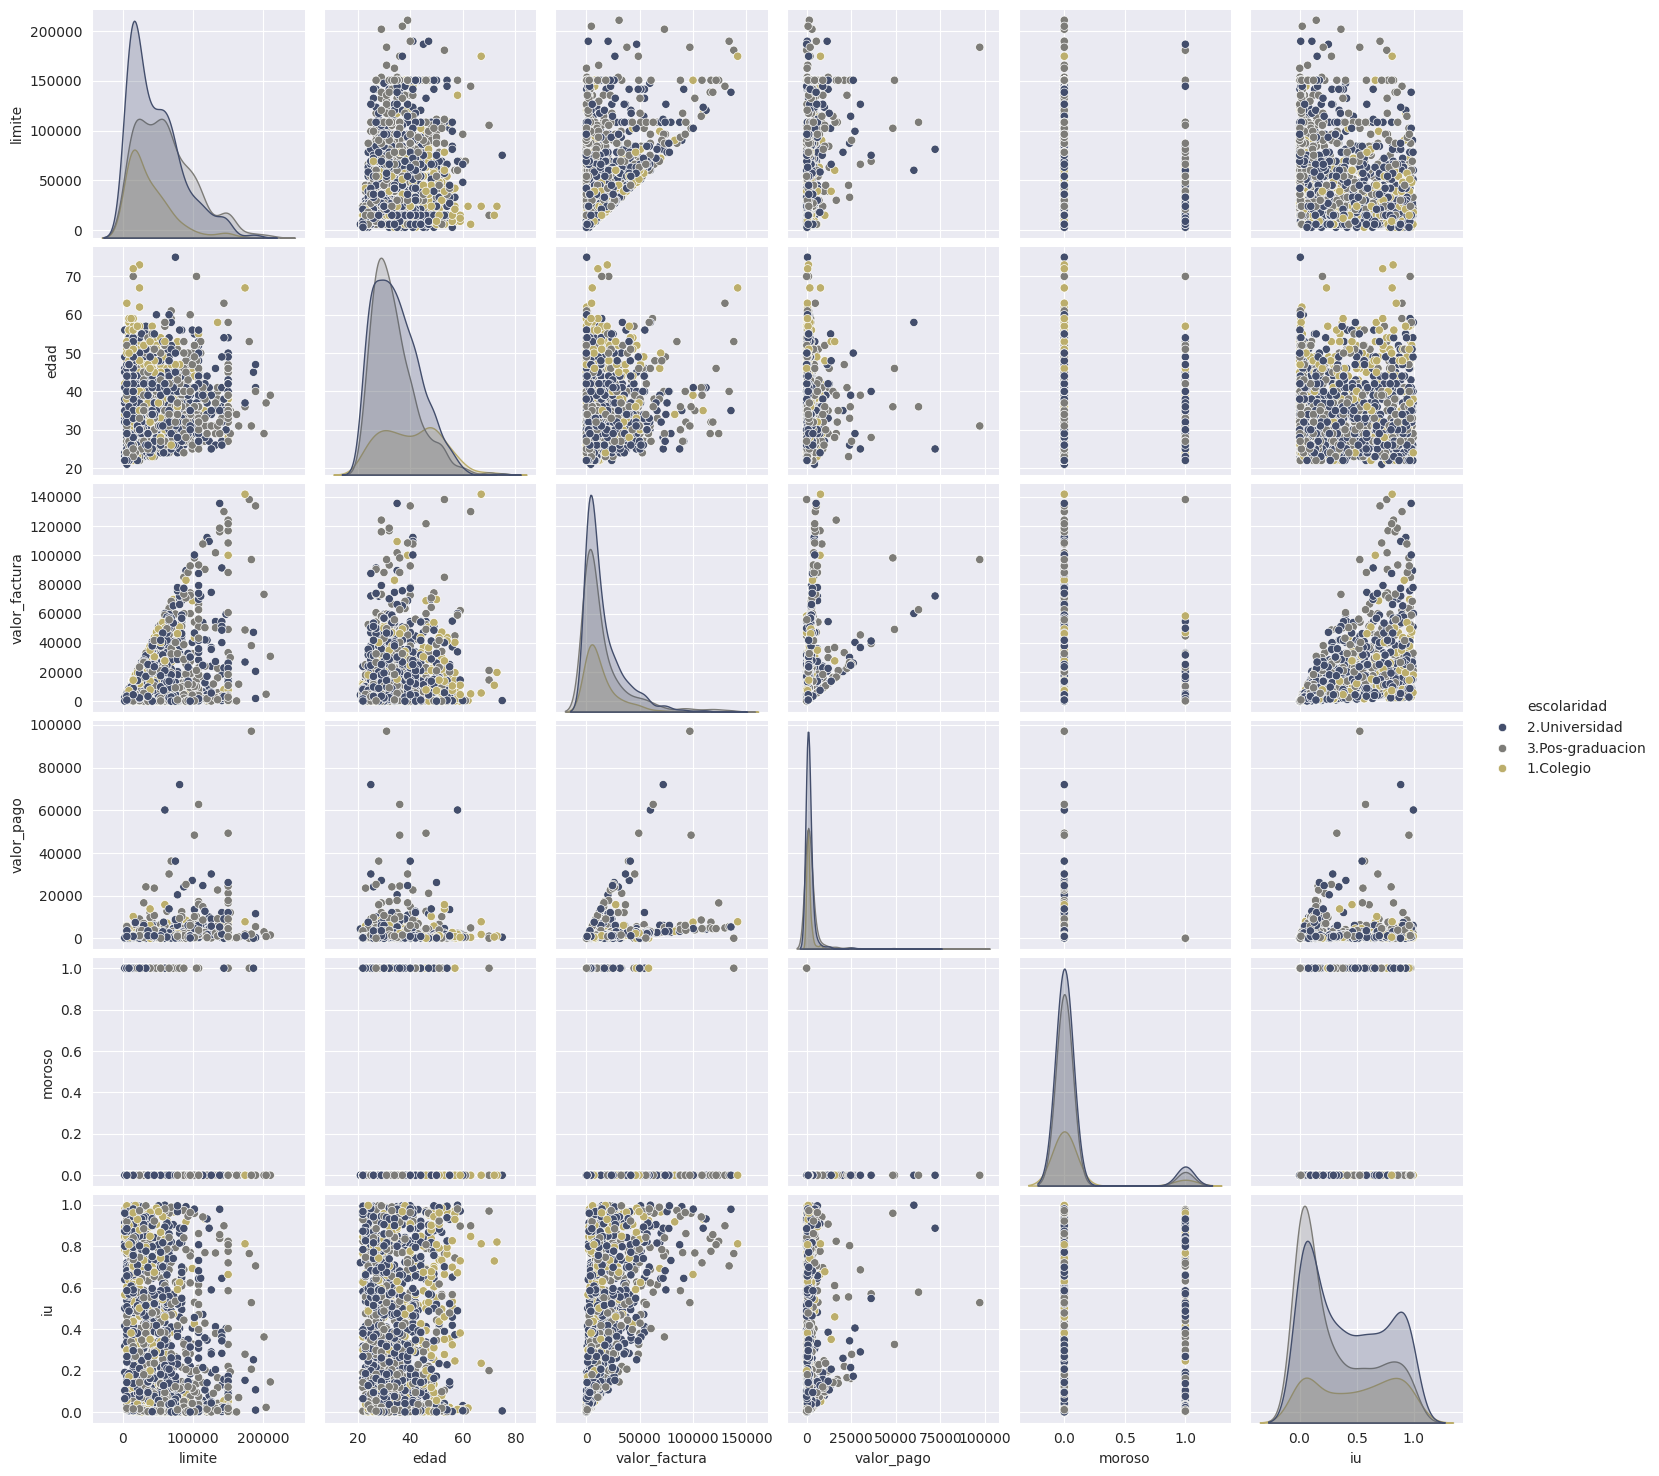

In [65]:
sns.pairplot(data=tarjetas, hue='escolaridad', palette='cividis')

In [67]:
tarjetas.describe()

,limite,edad,valor_factura,valor_pago,moroso,iu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010


##9.Conclusión:


Del análisis realizado, se encontró que existe correlación entre el limite de crédito, el indice de uso, el valor de factura y la morosidad, respecto a la edad, el estado civil y la escolaridad del titular de la cuenta. De forma general, podemos asumir que:

- Al rededor de 60% de los clientes cuentan con una cuenta corriente y tarjeta de crédito, mientras que los clientes con tarjeta de crédito pero sin cuenta corriente es de poco más del 40%.

- Habitualmente, los limites de crédito van de los $1000-80,000 MXN.

- Los clientes con mayor limite de crédito corresponden al rango de edad 30-40 años, seguido de las personas con 40-50 años. Las personas con 20-30 años cuentan con los limites más bajos.

- A medida que aumenta el valor de la factura aumenta el índice de uso, por lo que existen clientes que tienen alto limite y un alto iu, asi como clientes con bajo limite y bajo iu.



**De acuerdo a su escolaridad:**

- La mayor densidad de personas que poseen crédito, corresponde a quienes tienen estudios de 'Universidad', especificamente la población con 20-30 años, seguido por personas con 30-40 años. Los limites de crédito oscilan entre $1000-50,000 MXN y son quienes poseen el mayor índice de uso.

- Para el caso de personas con estudios de 'Pos-graduación', son el segundo grupo con mayor densidad de crédito, quienes en su mayoría pertenecen a los rangos de edad de 20-30 y 40-40 años. El limite de crédito suele variar entre $1000-100,000 MXN y su índice de uso es moderado.

- Asímismo, las personas con escolaridad de 'Colegio' son quienes representan la menor densidad de crédito. A diferencia de los casos anteriores, los limites de crédito van de los $1000-8000 MXN, y encontramos que este es el limite para todos los rangos de edades (de 20 hasta más de 50 años). Representan el índice de uso más bajo.


**De acuerdo al estado civil:**

- Las personas solteras suelen tener tener más crédito que las personas casadas, sin embargo, el limite de las personas casadas es superior al de las personas solteras.

- Las personas morosas tienen mas limite cuando son casados que cuando están solteras.


**De acuerdo a la morososidad:**

- Los clientes con mayor indice de uso y mayor posibilidad de ser moroso son quienes cuentan con estudios de 'Colegio' y 'Universidad'.

- No obstante, aunque las personas con 'Pos-graduación' son quienes representan el menor probabilidad de morosidad, son quienes adquieren un mayor limite de deuda.


**Test de hipótesis**

Se aceptó la hipótesis alternativa, dado que el p_value de nuestro test es 0.0103, lo que significa que la distribución de los grupos moroso y no moroso no es la misma.